<center><h1>Subscription Churn Rates</h1></center>

This SQL project revolves around a scenario where management has asked us to analyze the churn rate for the past three four months. In this fictional scenario, management would like to know how the business is going. To do this we will look at the ratio of total active users versus total cancelations, also known as the “churn rate”. This project utilizes temporary table techniques to perform multiple aggregations on 2 different company segments (87 and 30) which will result in analyzing a multi-month churn rate. The use of a cross join  and case functions are perfectly implemented in order to output an exact start and end time frame for active users so that a monthly cancelation rate can be ascertained. The results will show how the company has greatly increased their churn rate from January to March which is cause for alarm and will need further exploration to resolve the increase in cancellations. 

In [ ]:
WITH months AS(
  SELECT
    '2017-01-01' AS first_day,
    '2017-01-31' AS last_day
  UNION
  SELECT
    '2017-02-01' AS first_day,
    '2017-02-28' AS last_day
  UNION
  SELECT
    '2017-03-01' AS first_day,
    '2017-03-31' AS last_day
),
cross_join AS(
    SELECT *
    FROM subscriptions
    CROSS JOIN months
),
status AS(
  SELECT 
    id, 
    first_day AS month,
    CASE
      WHEN (subscription_start < first_day)
        AND (
          subscription_end > first_day
          OR subscription_end IS NULL
      ) AND (
        segment = 87
      )
      THEN 1
      ELSE 0
    END AS is_active_87,
    CASE
      WHEN (subscription_start < first_day)
        AND (
          subscription_end > first_day
          OR subscription_end IS NULL
      ) AND (
        segment = 30
      )
      THEN 1
      ELSE 0
    END AS is_active_30,
    CASE 
      WHEN 
        (subscription_end BETWEEN first_day AND last_day) 
        AND (
          segment = 87
        ) 
        THEN 1
        ELSE 0
    END AS is_canceled_87,
    CASE 
      WHEN 
        (subscription_end BETWEEN first_day AND last_day) 
        AND (
          segment = 30
        ) 
      THEN 1
      ELSE 0
    END AS is_canceled_30
  FROM cross_join),
status_aggregate AS
(SELECT
  month,
  SUM(is_active_87) AS sum_active_87,
  SUM(is_active_30) AS sum_active_30,
  SUM(is_canceled_87) AS sum_canceled_87,
  SUM(is_canceled_30) AS sum_canceled_30
FROM status
GROUP BY month)
SELECT 
  month,
  1.0 * sum_canceled_87 / sum_active_87 AS churn_rate_87,
  1.0 * sum_canceled_30 / sum_active_30 AS churn_rate_30
FROM status_aggregate;

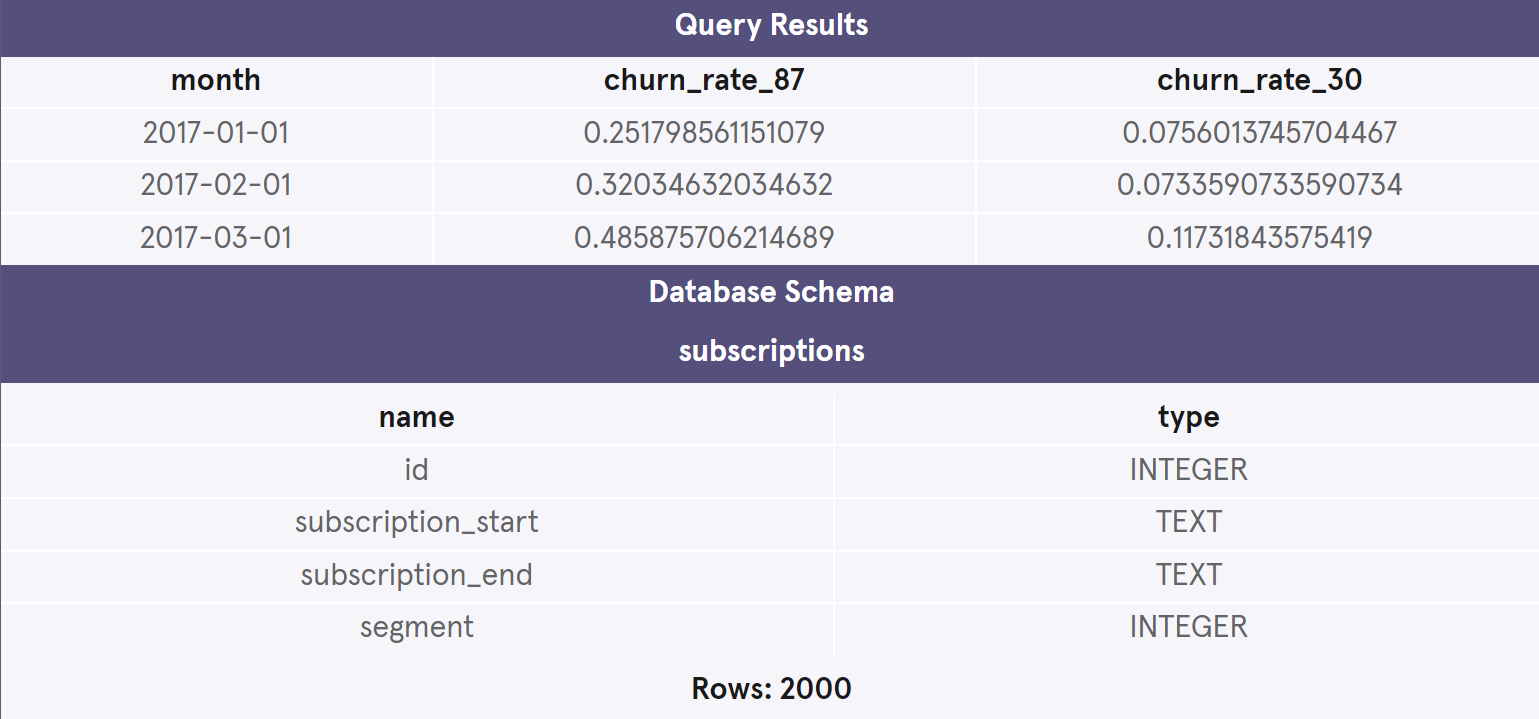

## Results
The results show that segment 87 has doubled their churn rate in a two month period which is a casue for alarm. There is not enough evidence yet to state whether or not segment 30 is dropping in performance, where a slight increase was followed up by a slight decrease in subscribers. More data is needed to get a clear indicator of the pattern of the churn rate for segement 30, whereas segment 87 has a clear linear drop.  